In [1]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from PIL import Image
import os

class aramicCharacterDataset(Dataset):
    def __init__(self, dataset_folder_path):
        self.root = dataset_folder_path
        self.data = self.parseFolders()  # self.data is a list of tuples, which contain (pathToImage, imageClassLabel)

        self.convert_tensor = transforms.ToTensor()
        self.charcterClasses = os.listdir(self.root)

        self.resize_image = transforms.Resize((50,50))

    def parseFolders(self): 
        dataTuples = []
        for idx, folderName in enumerate(os.listdir(self.root)):
            # path to the images in the folders
            imageFolderPath = os.path.join(self.root, folderName)
            
            label = idx # classification label (index of the classes)
            #imageFiles = [f for f in os.listdir(imageFolderPath) if os.path.isfile(os.path.join(imageFolderPath, f))]
            
            for imgFilename in os.listdir(imageFolderPath):
                
                # path to each image file
                imgPath = os.path.join(imageFolderPath, imgFilename)
                if os.path.isdir(imgPath):
                    # skip directories
                    continue
                dataTuples.append( (imgPath,label) ) # (path to the image, classification label)

        return dataTuples

    def __getitem__(self, index):
        path, label = self.data[index]
        img = Image.open(path)
        
        input_img = self.convert_tensor(img)
        input_img = self.resize_image(input_img)  # RESIZING?

        #print(input_img.shape)

        return input_img, label
    
    def __len__(self):
        return len(self.data)
        

In [19]:
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch

def collate_fn(batch):
    return tuple(zip(*batch))

dataSource = "monkbrill"

dataset = aramicCharacterDataset(dataSource)

CLASSES = dataset.charcterClasses

# make train and test splits from the single dataset source (above)
batch_size = 1
validation_split = .2
shuffle_dataset = True
random_seed = 42

# set indicies of training and validation set
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating train and validation data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, collate_fn=collate_fn)
validation_loader = DataLoader(dataset, batch_size=batch_size, sampler=validation_sampler, collate_fn=collate_fn)


# old way, using seperate folders (code from the DL project)
#dataLoader = DataLoader(dataset, batch_size=1, collate_fn=collate_fn, shuffle=True)


## THE IMAGES ARE DIFFERENT SIZES!!
but for now, resized to 50x50 in the "aramicCharacterDataset" class

(18,)


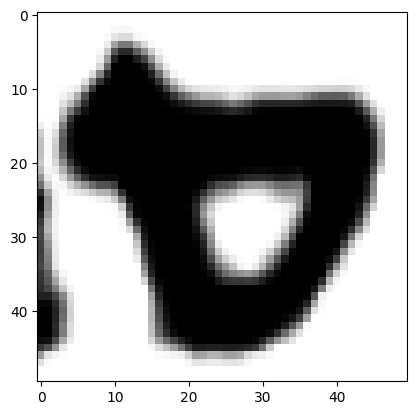

In [37]:
import matplotlib.pyplot as plt

imgs, targets = next(iter(train_loader))

print(targets)
plt.imshow(imgs[0][0], cmap='gray')

In [18]:
imgs

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.996